In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps

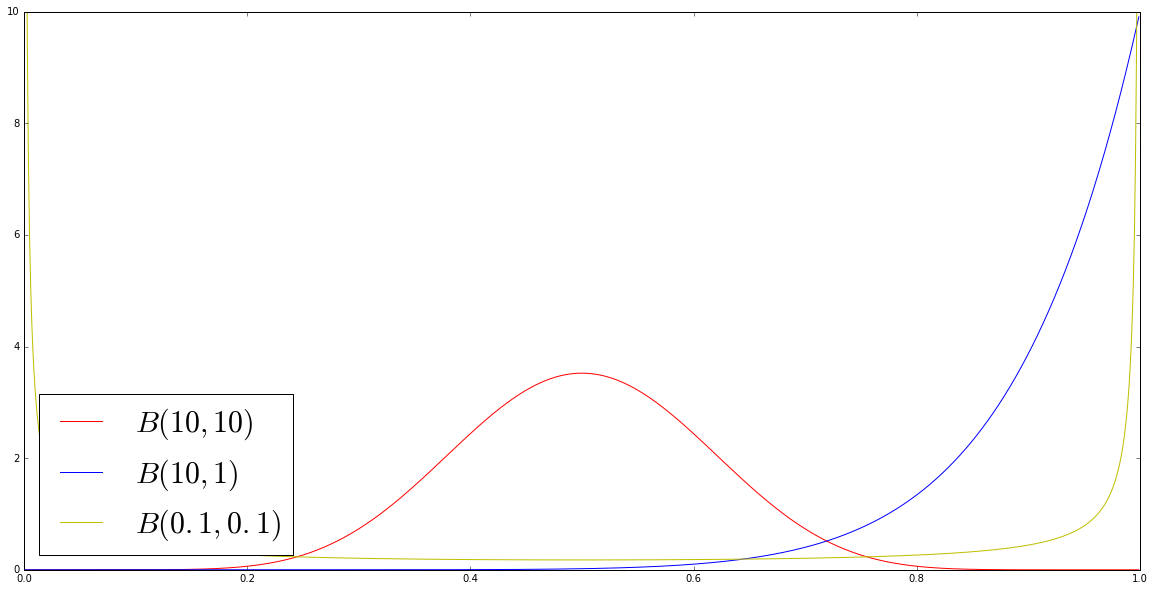

In [14]:
params = [[10,10],[10,1],[0.1,0.1]]
A_X = np.arange(0,1, 0.001)
colors = ['r','b','y']
plt.figure(figsize=(20, 10))

def label(param):
    a,b = param
    return r'$B(' + str(a) + r',' + str(b) + r')$'

for i in range(3):
    plt.plot(A_X,sps.beta.pdf(x=A_X,a=params[i][0],b=params[i][1]),
             label=label(params[i]), color=colors[i])
plt.legend(loc='lower left', prop={'size':30})

plt.xlim(0, 1)
plt.ylim(0, 10)
plt.show()

$B(10,10)$ ”монета скорее честна”(при таком априорном распределении наиболее вероятны значения p в окрестности 0.5)

$B(0.1,0.1)$ ”монета нечестная"(наименее вероятны значения в окрестности 0.5)

$B(10,1)$ ”монета скорее нечестная, перевес в сторону герба”(наиболее вероятны значения p в окрестности 1)


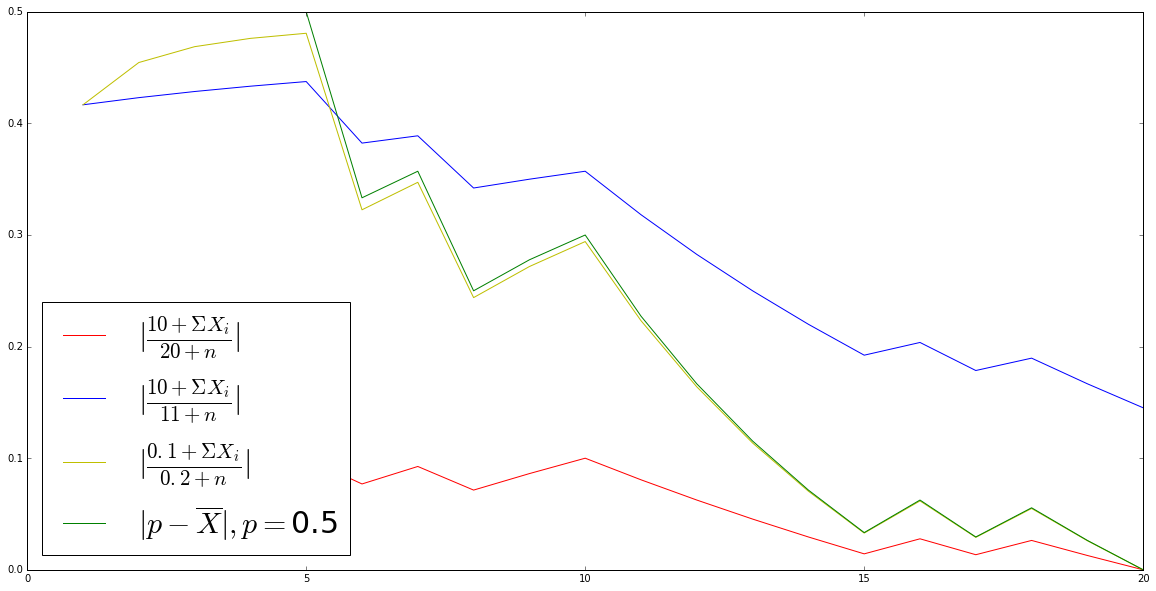

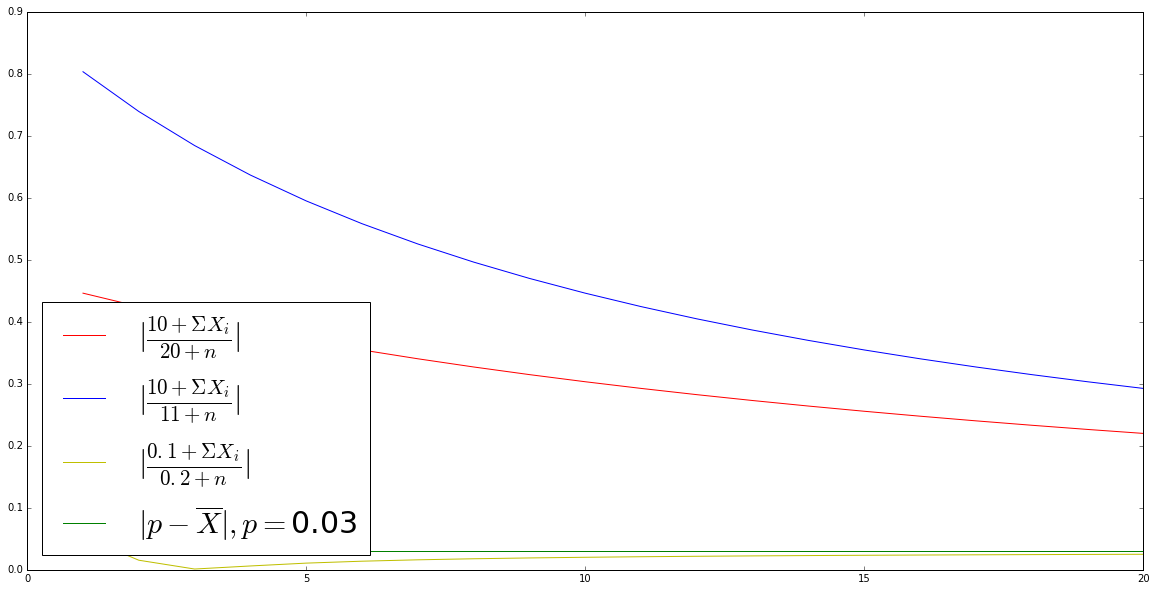

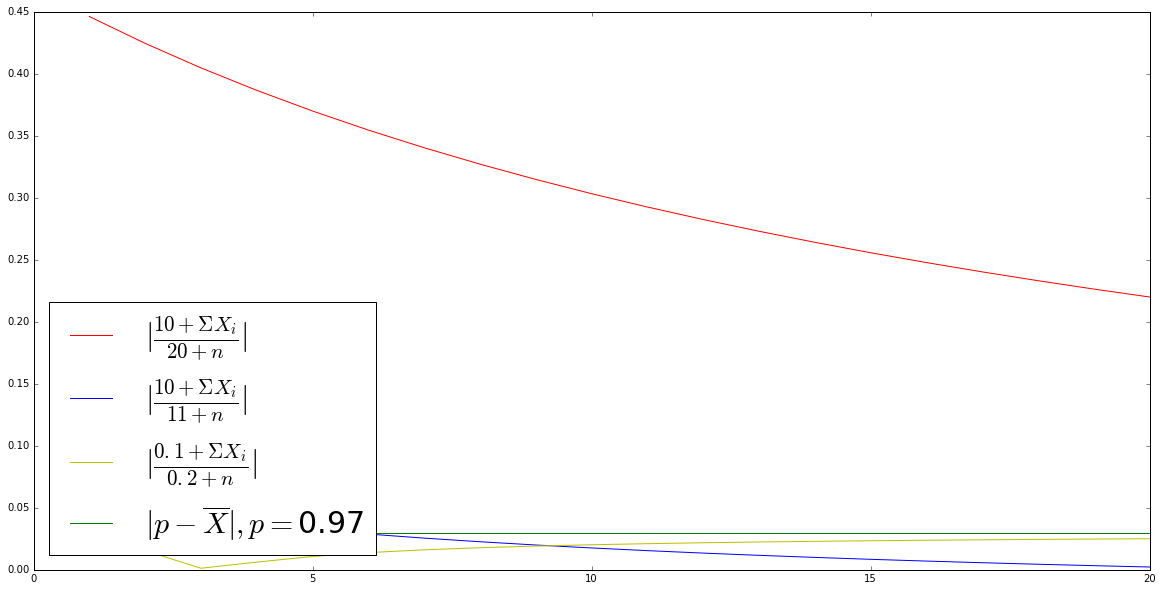

In [30]:
def bayes_estimation(X,param):
    a,b = param
    return (a + np.sum(X))/(b + a + len(X))

def label(param):
    a,b = param
    return r'$|\frac{' + str(a) + r'+\Sigma X_i}{' + str(a + b) + r'+n}|$'
N = 20
A_X = np.arange(1,N+1)
p_ki= [0.5, 0.03, 0.97]

for j in range (3):
    plt.figure(figsize=(20, 10))
    p = p_ki[j]
    X = sps.bernoulli.rvs(p=p,size=N)
    for i in range(3):
        param = params[i]
        B = [bayes_estimation(X[0:k+1],param) for k in range(len(X))]
        plt.plot(A_X,np.abs(np.add((B),-p)),colors[i],label=label(param))
    M = [np.mean(X[0:k+1]) for k in range(N)]    
    plt.plot(A_X,np.abs(np.add(M,-p)), color='g', label=r'$|p - \overline{X}|, p = $'+ str(p))
    plt.legend(loc='lower left', prop={'size':30})

    #plt.ylim(0, 0.5)
    plt.show()

$\overline X$ - оценка максимального правдоподобия.

Для p = 0.45 лучшая оценка при априорном $B(10, 10)$

Для p = 0.97 лучшая оценка при априорном $B(10, 1)$

Для p = 0.03 лучшая оценка при априорном $B(0.1, 0.1)$

Всё получилось именно так, как мы и предпологали